# Volume 3: Pandas 5 (GeoPandas) 
    Kameron Lightheart
    MATH 403
    10/29/2019

In [1]:
import geopandas
from matplotlib import pyplot as plt
import geoplot.crs as gcrs
import geoplot
import numpy as np
import pandas as pd
from shapely.geometry import Point

## Problem 1

Read in the file *airports.csv* as a pandas dataframe. Convert the dataframe into a geopandas dataframe.

Find the distance between the following airports:
1. Halifax / CFB Shearwater Heliport (Halifax, Canada) to Murtala Muhammed International Airport (Lagos, Nigeria)
2. Don Mueang International Airport (Bangkok, Thailand) and Beijing Capital International Airport (Beijing, China)
3. Salt Lake City International Airport (Salt Lake City, USA) and Auckland International Airport (Auckland, New Zealand)

In [36]:
def prob1(file="airports.csv"):
    # Read in data
    df = pd.read_csv(file)
    name = df["Name"]
    df = df.drop(columns="Name")
    df.set_index(name, inplace=True)
    
    # Create geocoordinate column 
    df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
    df['Coordinates'] = df['Coordinates'].apply(Point)                         
    
    # Cast Dataframe to GeoDataFrame
    df = geopandas.GeoDataFrame(df, geometry='Coordinates')
    
    # Calculate Distances
    airport2 = df.loc['Murtala Muhammed International Airport']['Coordinates']
    distance1 = df.loc['Halifax / CFB Shearwater Heliport']['Coordinates'].distance(airport2)
    
    airport2 = df.loc['Beijing Capital International Airport']['Coordinates']
    distance2 = df.loc['Don Mueang International Airport']['Coordinates'].distance(airport2)
    
    airport2 = df.loc['Auckland International Airport']['Coordinates']
    distance3 = df.loc['Salt Lake City International Airport']['Coordinates'].distance(airport2)
    
    return [distance1, distance2, distance3]

In [37]:
prob1()

[76.90077039796525, 30.65998230105051, 297.1352055031653]

## Problem 2
Read in the built-in GeoDataFrame *naturalearth_lowres*.
Create a GeoDataFrame that only contains information about the southern hemisphere.
Use this data to find the country with the smallest and largest area in the southern hemisphere.
Dissolve this GeoDataFrame to find the continent with the largest and smallest area in the southern hemisphere.

In [125]:
def prob2():
    # Read in world data
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    
    # Keep only southern longitutes
    south = world.cx[:, :0]
    
    # Get indicies of min and max size countries
    max_index = south['geometry'].area.idxmax()
    min_index = south['geometry'].area.idxmin()
    
    # Grab the names of those indicies
    max_area_nation = south.loc[max_index]["name"]
    min_area_nation = south.loc[min_index]["name"]
    
    # Dissolve by continent
    continents = world.dissolve(by='continent', aggfunc='sum')
    
    # Calculate min and max continent size
    max_cont = continents['geometry'].area.idxmax()
    min_cont = continents['geometry'].area.idxmin()
    
    return max_area_nation, min_area_nation, max_cont, min_cont

In [126]:
prob2()

('Antarctica', 'Vanuatu', 'Antarctica', 'Seven seas (open ocean)')

## Problem 3

Using the built-in GeoDataFrame *naturalearth_lowres* and GeoPlots, create population density plots for Asia and South America.
Use Mercator maps.

In [243]:
def prob3():
    # Read in world data
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    
    # Chance type to Mercator
    world.crs = {'init':'epsg:3395'}
    
    # Grab asia and south america
    asia = world[world.continent=='Asia']
    s_amer = world[world.continent=='South America']
    
    # Plot population densisty of each
    asia.plot(column='pop_est', cmap="OrRd")
    s_amer.plot(column='pop_est', cmap="OrRd")

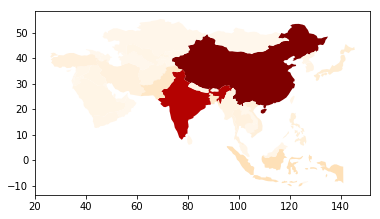

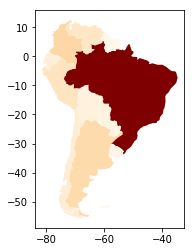

In [150]:
prob3()

## Problem 4

Merge the airports GeoDataFrame and the *naturalearth_lowres* GeodataFrame on their spatial data. Use this new GeoDataFrame to find the airport in the country with the smallest population estimate.

In [241]:
def prob4(file="airports.csv"):
    # Read in world data
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    
    # Read in and format airport data
    airports = pd.read_csv(file)
    name = airports["Name"]
    airports = airports.drop(columns="Name")
    airports.set_index(name, inplace=True)
    
    # Create geocoordinate column 
    airports['Coordinates'] = list(zip(airports.Longitude, airports.Latitude))
    airports['Coordinates'] = airports['Coordinates'].apply(Point)                         

    # Cast Dataframe to GeoDataFrame
    airports = geopandas.GeoDataFrame(airports, geometry='Coordinates')
    
    # Join world and airports on spacial data
    world_airports = geopandas.sjoin(world, airports, how='inner', op='intersects')
    
    # Compute min population country with an airport
    min_index = world_airports['pop_est'].idxmin()
    
    # Grab the airport id for that row
    airport_id_min = world_airports.loc[min_index]["Airport ID"]
    
    # Return the airport name associated with the index
    return airports[airports["Airport ID"] == airport_id_min].index.values
    

In [242]:
prob4()

array(['Mount Pleasant Airport'], dtype=object)